In [16]:
import pandas as pd

csv_data= """Name, Age, Score
Alice, 24, 88
Bob, 27, NaN
Charlie, 22, 95
Alice, 24, 88
Diana, ,82
Ethan,  26, 91
"""
with open("messy_data.csv", "w") as f:
  f.write(csv_data)


data= pd.read_csv("messy_data.csv")

print("Messy Data:")
print(data)

Messy Data:
      Name   Age  Score
0    Alice    24     88
1      Bob    27    NaN
2  Charlie    22     95
3    Alice    24     88
4    Diana           82
5    Ethan    26     91


In [17]:
data.columns= data.columns.str.strip()

data["Age"]= pd.to_numeric(data["Age"], errors= "coerce")

data["Score"]= pd.to_numeric(data["Score"], errors= "coerce")

data["Age"]= data["Age"].fillna(data["Age"].mean())
data["score"]= data["Score"].fillna(data["Score"].mean())

data= data.drop_duplicates()

data= data.rename(columns={"Name": "Full_Name", "Age": "Age_Years"})

print("✅ Cleaned Data:")
print(data)

data.to_csv("cleaned_data.csv", index=False)

✅ Cleaned Data:
  Full_Name  Age_Years  Score  score
0     Alice       24.0   88.0   88.0
1       Bob       27.0    NaN   88.8
2   Charlie       22.0   95.0   95.0
4     Diana       24.6   82.0   82.0
5     Ethan       26.0   91.0   91.0


In [18]:
import pandas as pd

titanic= pd.read_csv("train.csv")

print(titanic.head())

print("\nDataset Info")
print(titanic.info())

print("\nMissing Values:")
print(titanic.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

D

In [19]:
titanic["Age"]= titanic["Age"].fillna(titanic["Age"].mean())

titanic["Embarked"]= titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])

titanic= titanic.drop(columns=["Cabin"])

titanic= titanic.rename(columns={
  "SibSp": "Siblings_Spouses",
  "Parch": "Parents_Children"
})

print("✅ Cleaned Titanic Data Preview:")
print(titanic.head())

titanic.to_csv("titanic_cleaned.csv", index=False)
print("\nFile saved as titanic_cleaned.csv")



✅ Cleaned Titanic Data Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

   Siblings_Spouses  Parents_Children            Ticket     Fare Embarked  
0                 1                 0         A/5 21171   7.2500        S  
1                 1                 0          PC 17599  71.2833        C  
2                 0                 0  STON/O2. 3101282   7.9250        S  
3                 1       

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic= pd.read_csv("titanic_cleaned.csv")

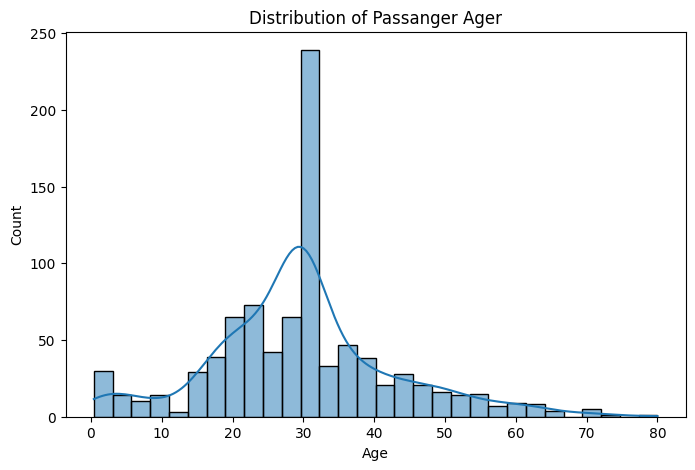

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(titanic["Age"], bins=30, kde=True)
plt.title("Distribution of Passanger Ager")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Most passengers are between 20–40 years old, with a smaller group of children under 10.

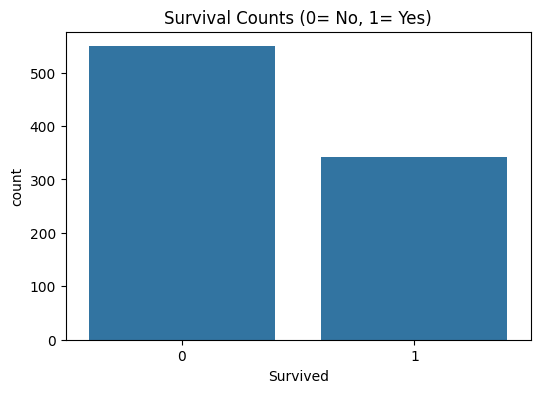

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=titanic)
plt.title("Survival Counts (0= No, 1= Yes)")
plt.show()

About twice as many people did not survive (0) compared to those who did (1).

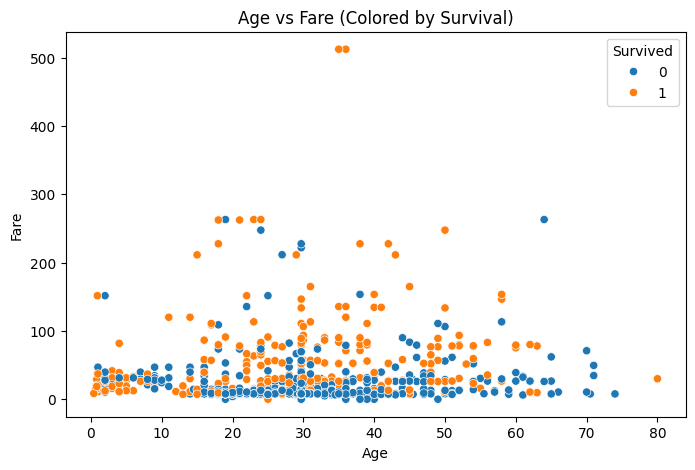

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=titanic)
plt.title("Age vs Fare (Colored by Survival)")
plt.show()

Passengers who paid higher fares had a better chance of survival, especially younger ones.